# 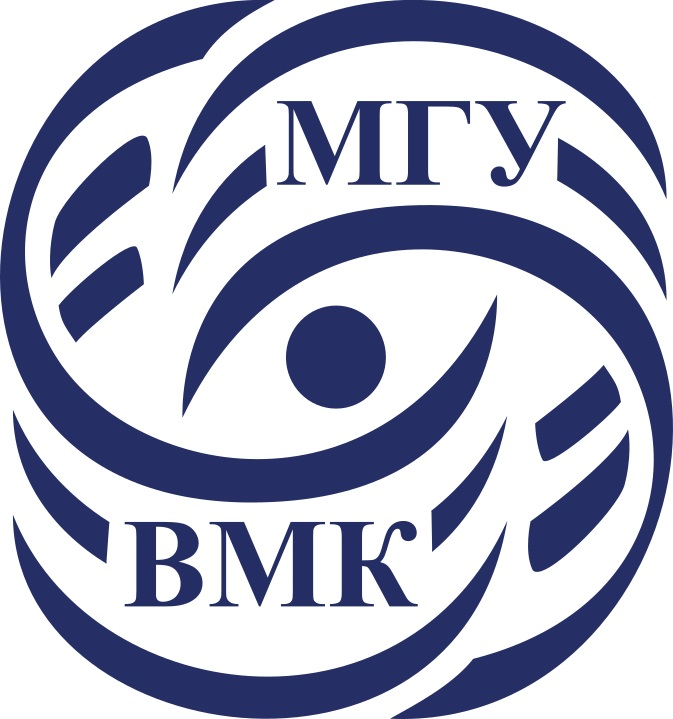

# Машинное обучение. ВМК МГУ

# Практическое задание 8: Частичное Обучение. Методы снижения размерности.
## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>


# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>









<font color="white" style="opacity:0.2024"></font>
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 60 минут </font>**

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

Перед началом выполнения переведите ноутбук в `Доверенный режим` (`Trusted`) для корректного отображения изображений:

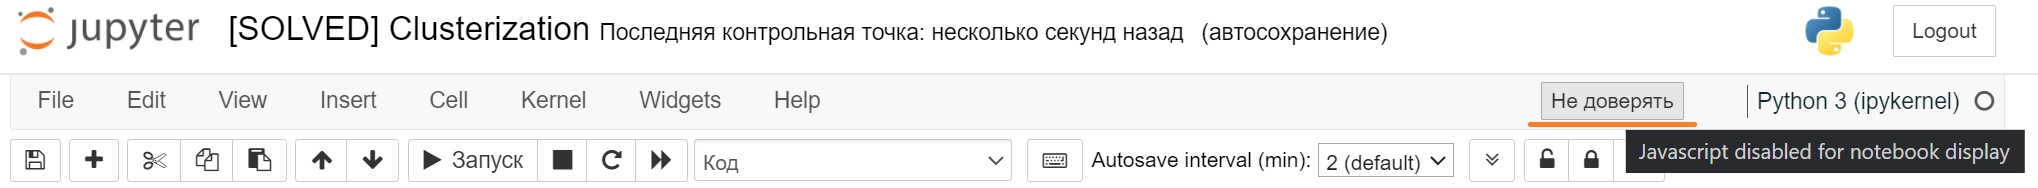

In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

# 0. Введение.

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

-----

<font color='OrangeRed'>**Важно!**</font> В этом задании мы будем использовать полное виртуальное окружение, так как понадобятся библиотеки `torch` и `tensorflow`

Обратите внимание, что установка `torch` и `tensorflow` через `pip `может сломать ваше окружение, особенно если вы используете GPU. Выполняйте их установку в соответствии с Вашей конфигурацией системы или в отдельном виртуальном окружении

In [2]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 19ZRLAdlNBI5OScrbxXzO3iaWJSkJlXeA
! pip install -r /content/requirements_2024_25_for_colab_full.txt

In [3]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# О задании

В данной работе вам будет предложено применить кластеризацию и снижение размерности в задачах **Частичного Обучения** (Semi-Supervised learning).

Здесь перечислены основные функции и библиотеки, которые могут понадобиться Вам в процессе выполнения задания. Подключение других библиотек возможно, но нежелательно. **Работа каких-либо других библиотек не гарантируется.**

In [175]:
import os

# Подавим уведомления о проблемах c tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import warnings

import numpy as np

import pandas as pd

import tqdm.auto as tqdm

import scipy.spatial.distance

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from torchvision.datasets import MNIST

import sklearn

from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier

# Библиотека umap-learn, а не umap
from umap import UMAP

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.metrics import accuracy_score, pairwise_distances

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

# Подавим уведомления о проблемах со сходимостью в sklearn
simplefilter("ignore", category=ConvergenceWarning)

**<font color='OrangeRed'>Обратите внимание</font>, что динамическое содержимое может некорректно сохраняться в jupyter notebook. Используйте его только для локальной визуализации. Все графики, необходимые для сдачи задания должны быть статическими. Переход в статический режим происходит с помощью магической команды `%matplotlib inline`.**

**<font color='OrangeRed'>Обязательно убедитесь, что все графики корректно сохранились корректно в ноутбуке перед сдачей в систему.</font>** Для этого достаточно открыть загруженный в систему файл и, просмотрев его, убедиться, что все сохранилось корректно

In [25]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

## Ещё несколько важных замечаний

При выполнении задания <font color='OrangeRed'>запрещено</font>:
1. Менять те seed, которые явно указаны в коде
2. Менять прототипы функций, классов, методов классов
3. Менять константы, используемые для генерации выборок

При оформлении задания обратите внимание на форматирование кода и на оформление графиков:

* Весь код должен быть оформлен в строгом соответствии с [PEP8](https://pep8.org/) (для юнит-тестов обязательно, для ноутбука очень желательно)

Графики должны быть с одной стороны понятными и информативными, а с другой стороны *красивыми*. Вот несколько пунктов, которые помогут удовлетворить этим требования:
1. Все графики должны быть отрисованы в **векторном формате**. Обратите внимание, что смена режима графиков с динамического на статический и обратно может приводить к сбросу параметров отрисовки графиков. Переход в векторный режим можно выполнить с помощью команды `matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')`. Если изображения в векторном формате приводят к слишком большому размеру Jupyter Notebook можете использовать растровые изображения с **высоким dpi**. Напирмер, можно установить глобальный dpi в matplotlib: `matplotlib.rcParams['figure.dpi'] = 300`
2. На всех графиках без исключения должна быть нарисована сетка
3. Все графики и группы графиков должны иметь заголовок (`title`)
4. При необходимости оси должны быть подписаны
5. Если на графике отображено несколько сущностей (линии/точки/bar разных цветов, формы и так далее), то необходима исчерпывающая легенда
6. Все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном и так далее)
7. Масштаб по каждой оси на графике должен быть выбран правильно. Используйте масштабы `log`, `symlog` по необходимости
8. Если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах)
9. Частота отметок по каждой оси должна быть тщательно подобрана, по необходимости задавайте `[xy]ticks`, `[xy]ticklabels` вручную. Подписи тиков на осях не должны сливаться как на одной оси, так и между ними
10. Помните, что matplotlib умеет выполнять [рендеринг Latex](https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html). Используйте эту возможность для написания формул в заголовках, легенде и в подписях осей
11. Используйте *красивую* цветовую палитру с хорошо различимыми цветами. Примеры цветовых палитр можно посмотреть [здесь](https://matplotlib.org/stable/gallery/color/colormap_reference.html). При наличи особенностей восприятия цвета можно использовать специальные палитры:
```python
plt.style.use('seaborn-colorblind')
# Или
plt.style.use('tableau-colorblind10')
# Затем, при отрисовке графиков не используйте параметр cmap
```
12. Графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

# <font color='DarkOrange'>**1. Частичное обучение.  [кросспроверка 6 баллов,  unittests 4 баллa]**</font>

В этой части мы рассмотрим применение алгоритмов снижения размерности и кластеризации в контексте задач классификации в постановке Semi-Supervised learning.

Рассмотрим задачу классификации изображений из датасета MNIST. Предположим, что известна только небольшая часть разметки по которой мы хотим обучить классификатор. В отличии от классических задач обучения с учителем здесь мы можем использовать большой объём неразмеченных объектов.

<font color='LightSteelBlue'>**Пояснение:**</font> Будем далее считать, что неразмеченные объекты имеют метку `-1`

Существует много вариантов решения данной задачи. Предлагается рассмотреть следующие из них:
1. Обучение модели, например, логистической регрессии на размеченной части
2. Методы SelfTraining, в частости `SelfTrainingClassifier` с логистической регрессией в качестве базовой модели
3. Использование кластеризации для определения групп похожих объектов и размеченной подвыборки для определения меток кластеров

Каждый из данных вариантов можно обучать на разных признаковых пространствах. Предлагается проверить, как методы снижения размерности будут влиять на качество итогового алгоритма. Нужно учесть, что не все алгоритмы снижения размерности допускают преобразование новых объектов в низкоразмерное пространство, поэтому предлагается сравнить `UMAP` с исходным признаковым пространством.


#### <font color='DarkOrange'>**Задание 1.1 [unittests, 4 баллa]**</font>

Реализуйте третью из предложенных моделей. Подробная спецификация и описание входных данных к тестам указаны в <font color='DarkSeaGreen'>**описании задания**.</font>

<font color='OrangeRed'>**Замечание:**</font> В данном пункте разрешено использовать `sklearn.cluster.KMeans`

In [218]:
class KMeansClassifier(sklearn.base.BaseEstimator):
    def __init__(self, n_clusters):
        super().__init__()
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters)
        self.mapping = None

    def fit(self, data, labels):
        cluster_labels = self.kmeans.fit_predict(data)
        self.mapping, _ = self._best_fit_classification(cluster_labels, labels)

        return self

    def predict(self, data):
        cluster_preds = self.kmeans.predict(data)

        return np.array([self.mapping[cluster] for cluster in cluster_preds])

    def _best_fit_classification(self, cluster_labels, true_labels):
        unique_clusters = np.arange(self.n_clusters)
        unique_classes = np.unique(true_labels[true_labels != -1])

        mapping = np.zeros(self.n_clusters, dtype=int)

        for cluster in unique_clusters:
            mask = cluster_labels == cluster
            cluster_labels_in = true_labels[mask]

            labeled_mask = cluster_labels_in != -1
            labeled_classes = cluster_labels_in[labeled_mask]

            if len(labeled_classes) > 0:
                counts = np.bincount(labeled_classes)
                mapping[cluster] = np.argmax(counts)
            else:
                counts = np.bincount(true_labels[true_labels != -1])
                mapping[cluster] = np.argmax(counts)

        predicted_labels = np.array([mapping[cluster] for cluster in cluster_labels])

        return mapping, predicted_labels

Проверьте `KMeansClassifier._best_fit_classification` на простейших тестах:

In [219]:
def all_equal(list_left, list_right):
    assert np.all([np.all(left == right) for left, right in zip(list_left, list_right)])

all_equal(
    KMeansClassifier(10)._best_fit_classification(
        np.array([2, 2, 2, 1, 1, 1, 0, 0, 0]),
        np.array([5, 5, 6, 8, 7, 6, 6, 7, 7]),
    ),
    (np.array([7, 6, 5, 6, 6, 6, 6, 6, 6, 6]), np.array([5, 5, 5, 6, 6, 6, 7, 7, 7]))
)

all_equal(
    KMeansClassifier(10)._best_fit_classification(
        np.array([ 4,  4,  4, 1, 1, 1, 2, 2, 2, 3, 3, 3,  0, 0,  0, 0,  0]),
        np.array([-1, -1, -1, 5, 5, 6, 8, 7, 6, 6, 7, 7, -1, 8, -1, 3, -1]),
    ),
    (np.array([3, 5, 6, 7, 6, 6, 6, 6, 6, 6]), np.array([6, 6, 6, 5, 5, 5, 6, 6, 6, 7, 7, 7, 3, 3, 3, 3, 3]))
)

In [220]:
# 1: базовое соответствие кластеров и классов
all_equal(
    KMeansClassifier(5)._best_fit_classification(
        np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4]),
        np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5])
    ),
    (np.array([1, 2, 3, 4, 5]), np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5]))
)

# 2: поведение для кластеров без размеченных объектов с равенством глобальных классов
all_equal(
    KMeansClassifier(5)._best_fit_classification(
        np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4]),
        np.array([-1, -1, 2, 2, 3, 3, 4, 4, -1, -1])
    ),
    (np.array([2, 2, 3, 4, 2]), np.array([2, 2, 2, 2, 3, 3, 4, 4, 2, 2]))
)

# 3: выбор минимального класса при равенстве в одном кластере
all_equal(
    KMeansClassifier(1)._best_fit_classification(
        np.array([0, 0, 0, 0]),
        np.array([1, 2, 2, 1])
    ),
    (np.array([1]), np.array([1, 1, 1, 1]))
)

# 4: поведение при почти полной неразмеченности
all_equal(
    KMeansClassifier(5)._best_fit_classification(
        np.array([0, 0, 1, 1, 2, 3, 4]),
        np.array([-1, -1, -1, 0, -1, -1, -1])
    ),
    (np.array([0, 0, 0, 0, 0]), np.array([0, 0, 0, 0, 0, 0, 0]))
)

# 5: устойчивость к смешанной частичной разметке
all_equal(
    KMeansClassifier(5)._best_fit_classification(
        np.array([0, 0, 1, 1, 1, 2, 2, 3, 4, 4, 4]),
        np.array([5, -1, 5, 6, -1, 6, 6, -1, 7, 7, -1])
    ),
    (np.array([5, 5, 6, 6, 7]), np.array([5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7]))
)

# 6: поведение при n_clusters > max(cluster_labels)
all_equal(
    KMeansClassifier(7)._best_fit_classification(
        np.array([0, 0, 1, 1, 2, 2]),
        np.array([1, 1, 2, 2, 3, 3])
    ),
    (np.array([1, 2, 3, 1, 1, 1, 1]), np.array([1, 1, 2, 2, 3, 3]))
)

# 7: выбор глобального класса для кластеров без размеченных объектов (с равенством)
all_equal(
    KMeansClassifier(4)._best_fit_classification(
        np.array([0, 0, 1, 1, 2, 2, 3, 3]),
        np.array([1, 1, 2, 2, -1, -1, -1, -1])
    ),
    (np.array([1, 2, 1, 1]), np.array([1, 1, 2, 2, 1, 1, 1, 1]))
)

# 8: выбор глобального класса с максимальной частотой (без равенства)
all_equal(
    KMeansClassifier(4)._best_fit_classification(
        np.array([0, 0, 1, 1, 2, 2, 3, 3]),
        np.array([1, 1, 2, 2, 2, 2, -1, -1])
    ),
    (np.array([1, 2, 2, 2]), np.array([1, 1, 2, 2, 2, 2, 2, 2]))
)

Теперь создадим модель которая будет объединять все вышеописанные способы решения задачи Semi-Supervised learning.

#### <font color='DarkOrange'>**Задание 1.2 [код]**</font>

Реализуйте модель, которая в зависимости от параметра `data_processing` будет выполнять то или иное преобразование признакового пространства. Параметр `model` должен задавать одну из трёх описанных выше моделей поверх преобразованных данных. Вспомогательные аргументы нужно передавать через словари `reducer_kwargs`, `model_kwargs` (например, размерность пространства для методов снижения размерности, коэффициент регуляризации логистической регрессии, число кластеров KMeans и так далее).

<font color='OrangeRed'>**Замечание:**</font> Большую часть времени работы модели (как обучения, как и предсказания) будет занимать преобразование признаков в низкоразмерное пространство с помощью UMAP. Если несколько способов, как ускорить данный процесс:
1. Параметр `n_neighbors` у UMAP значительно влияет на скорость работы. Можно установить его меньше, чем по умолчанию (не желательно ставить его меньше $5-7$). Попробуйте подобрать этот параметр в зависимости от качества визуализации в задании **1.3**
2. Так как UMAP метрический алгоритм, он требует большого числа вычислений попарных расстояний между точками. При выполнении перебора гиперпараметров в заданиях ниже можно значительно сэкономить, предподсчитав попарное расстояние между объектами для обучения и расстояние между объектам для предсказаний и объектами обучающей выборки. Используйте для работы в таком режиме `metric='precomputed'`. В таком режиме UMAP выдаёт ненужные warnings. Подавите их с помощью соответствующего контекстного менеджера:
```python
with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Вызовы UMAP. __init__ / fit / fit_transform / transform
```
Не забудьте про масштабирование признаков

In [66]:
class MetaSemiSupervisedModel(sklearn.base.BaseEstimator):
    def __init__(self, data_processing, model, reducer_kwargs, model_kwargs):
        '''
        :param str data_processing:
            Если data_processing == 'UMAP', то входные данные необходимо преобразовать с помощью данного алгоритма с
                числом компонент reducer_kwargs['n_components'].
            Опционально, используйте reducer_kwargs['metric'] для ускорения алгоритма с помощью предподсчитанной
                матрицы расстояний
            Иначе, не преобразовывать входные данные
        :param str model:
            Если model == 'LogisticRegression', то использовать логистическую регрессию на размеченных данных
                и коэффициентом регуляризации model_kwargs['C']
            Если model == 'SelfTrainingClassifier', то использовать SelfTrainingClassifier с базовой моделью LogisticRegression
                и коэффициентом регуляризации model_kwargs['C']
            Если model == 'KMeansClassifier', то использовать KMeansClassifier с числом кластеров model_kwargs['n_clusters']
        :param dict reducer_kwargs:
        :param dict model_kwargs:
        '''
        super().__init__()
        self.data_processing = data_processing
        self.model_name = model
        self.reducer_kwargs = reducer_kwargs
        self.model_kwargs = model_kwargs
        self.model = None
        self.reducer = None
        self.scaler = StandardScaler()
        self.X_train_ = None
        self.labels_train_ = None

    def fit(self, data, labels):
        '''
        :param np.ndarray data: Непустой двумерный массив векторов-признаков объектов обучающей выборки.
            Если reducer_kwargs['metric'] == 'precomputed', тогда @data квадратная матрица попарных расстояний между объектами
        :param np.ndarray labels: Непустой одномерный массив. Разметка обучающей выборки. Неразмеченные объекты имеют метку -1.
            Размеченные объекты могут иметь произвольную неотрицательную метку. Существует хотя бы один размеченный объект
        :return MetaSemiSupervisedModel
        '''
        self.labels_train_ = labels.copy()

        # масштабирование
        metric = self.reducer_kwargs.get('metric', 'euclidean')

        if self.data_processing == 'UMAP':
            if metric != 'precomputed':
                data_scaled = self.scaler.fit_transform(data)
            else:
                data_scaled = data
        else:
            data_scaled = self.scaler.fit_transform(data)

        self.X_train_ = data_scaled

        # создание и обучение редуктора
        if self.data_processing == 'UMAP':
            n_components = self.reducer_kwargs.get('n_components', 2)
            n_neighbors = self.reducer_kwargs.get('n_neighbors', 15)

            self.reducer = UMAP(
                n_components=n_components,
                metric=metric,
                n_neighbors=n_neighbors,
                random_state=42
            )

            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                self.X_train_ = self.reducer.fit_transform(data_scaled)
        else:
            self.reducer = None

        # создание и обучение модели
        if self.model_name in ['LogisticRegression', 'SelfTrainingClassifier']:
            C = self.model_kwargs.get('C', 1.0)
            base_clf = LogisticRegression(C=C, max_iter=1000, random_state=42)

            if self.model_name == 'LogisticRegression':
                labeled_mask = labels != -1
                X_labeled = self.X_train_[labeled_mask]
                y_labeled = labels[labeled_mask]
                self.model = base_clf
                self.model.fit(X_labeled, y_labeled)

            elif self.model_name == 'SelfTrainingClassifier':
                self.model = SelfTrainingClassifier(base_clf)
                self.model.fit(self.X_train_, labels)

        elif self.model_name == 'KMeansClassifier':
            n_clusters = self.model_kwargs.get('n_clusters', 8)
            self.model = KMeansClassifier(n_clusters=n_clusters)
            self.model.fit(self.X_train_, labels)

        else:
            raise ValueError(f"Unknown model type: {self.model_name}")

        return self

    def predict(self, data):
        '''
        Функция выполняет предсказание меток класса для объектов, поданных на вход
        :param np.ndarray data: Непустой двумерный массив векторов-признаков объектов.
            Если reducer_kwargs['metric'] == 'precomputed', тогда @data прямоугольная матрица расстояний между
            каждым объектом для которого делается предсказание и каждым объектом обучающей выборки.
        :return np.ndarray: Предсказанные метки класса
        '''
        metric = self.reducer_kwargs.get('metric', 'euclidean')

        if self.data_processing == 'UMAP':
            if metric == 'precomputed':
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    X_new = self.reducer.transform(data)
            else:
                data_scaled = self.scaler.transform(data)
                X_new = self.reducer.transform(data_scaled)
        else:
            X_new = self.scaler.transform(data)

        return self.model.predict(X_new)

Загрузим датасет MNIST. Для ускорения перебора гиперпараметров, можете уменьшить число объектов в выборке. Не делайте это число менее $4000$.

In [184]:
mnist_n_objects = 4000

In [185]:
mnist_test_dataset = MNIST('./mnist', train=False, download=True)
mnist_train_dataset = MNIST('./mnist', train=True, download=False)

mnist_labels_test = np.array(mnist_test_dataset.targets)
mnist_labels_train = np.array(mnist_train_dataset.targets)

mnist_images_test = mnist_test_dataset.data.numpy()
mnist_images_train = mnist_train_dataset.data.numpy()

mnist_images_test, _, mnist_labels_test, _ = train_test_split(
    mnist_images_test, mnist_labels_test,
    train_size=mnist_n_objects, stratify=mnist_labels_test, random_state=6886
)
mnist_images_train, _, mnist_labels_train, _ = train_test_split(
    mnist_images_train, mnist_labels_train,
    train_size=mnist_n_objects, stratify=mnist_labels_train, random_state=6886
)

mnist_data_test = (mnist_images_test.astype(np.float32) / 255.0).reshape([mnist_images_test.shape[0], -1])
mnist_data_train = (mnist_images_train.astype(np.float32) / 255.0).reshape([mnist_images_train.shape[0], -1])

#### <font color='DarkOrange'>**Задание 1.3 [код]**</font>

Примените метод снижения размерности на ваш вкус для новых данных и изобразите результат на графике. Используйте это представление для визуализации в дальнейшем.

<font color='OrangeRed'>**Замечание:**</font> Не забудьте, что масштаб признаков существенно влияет на работу алгоритма снижения размерности.

<font color='OrangeRed'>**Замечание:**</font> Для отрисовки низкоразмерных данных можно использовать функцию `plot_interactive`. Данная функция может работать и в интерактивном режиме, которым можно воспользоваться, если ваша среда выполнения его поддерживает. Не забудьте переключиться в статический режим после отрисовки динамического контента с помощью магической команды `%matplotlib inline`.

In [10]:
def plot_interactive(lowd_data, images, labels, names, n_dots=1000, image_scale=1.0):
    with matplotlib.rc_context(rc={
        'font.size': image_scale * matplotlib.rcParams['font.size'],
        'xtick.major.size': image_scale * matplotlib.rcParams['xtick.major.size'],
        'xtick.minor.size': image_scale * matplotlib.rcParams['xtick.minor.size'],
        'ytick.major.size': image_scale * matplotlib.rcParams['ytick.major.size'],
        'ytick.minor.size': image_scale * matplotlib.rcParams['ytick.minor.size'],

        'axes.linewidth': image_scale * matplotlib.rcParams['axes.linewidth'],
        'grid.linewidth': image_scale * matplotlib.rcParams['grid.linewidth'],
        'patch.linewidth': image_scale * matplotlib.rcParams['patch.linewidth'],
        'xtick.major.width': image_scale * matplotlib.rcParams['xtick.major.width'],
        'xtick.minor.width': image_scale * matplotlib.rcParams['xtick.minor.width'],
        'ytick.major.width': image_scale * matplotlib.rcParams['ytick.major.width'],
        'ytick.minor.width': image_scale * matplotlib.rcParams['ytick.minor.width'],

        'lines.markeredgewidth': image_scale * matplotlib.rcParams['lines.markeredgewidth'],
    }):
        fig, ax = plt.subplots(1, 1, figsize=(image_scale * 10, image_scale * 5))
        fig.set_dpi(300)
        ax.grid(True)

        n_clusters = len(np.unique(labels))

        scatter = plt.scatter(
            lowd_data[:n_dots, 0], lowd_data[:n_dots, 1], s=image_scale * 10,
            c=labels[:n_dots], cmap=plt.get_cmap('tab20', n_clusters), edgecolors='none'
        )

        cbar = plt.colorbar(scatter, ax=ax, label='Название кластера')
        cbar.set_ticks(np.min(labels[:n_dots]) + (np.arange(n_clusters) + 0.5) * (n_clusters - 1) / n_clusters)
        cbar.set_ticklabels(names)

        offset_image = OffsetImage(images[0], zoom=image_scale * 2.0)
        ann_bbox = AnnotationBbox(
            offset_image, (0,0), xybox=(image_scale * 50., image_scale * 50.), xycoords='data',
            boxcoords="offset points", pad=0.3, arrowprops=dict(
                arrowstyle='->, head_length={0:.2f}, head_width={1:.2f}'.format(
                    image_scale * 0.4, image_scale * 0.2
                )
            )
        )
        ax.add_artist(ann_bbox)
        ax.set_title('Распределение данных CIFAR10 в проекции на 2 случайные оси')
        ann_bbox.set_visible(False)

        def image_hover(event):
            if scatter.contains(event)[0]:
                ind, *_ = scatter.contains(event)[1]["ind"]
                w, h = fig.get_size_inches() * fig.dpi
                ws = (event.x > w / 2.) * -1 + (event.x <= w / 2.)
                hs = (event.y > h / 2.) * -1 + (event.y <= h / 2.)
                ann_bbox.xybox = (image_scale * 50.0 * ws, image_scale * 50.0 * hs)
                ann_bbox.set_visible(True)
                ann_bbox.xy =(lowd_data[ind, 0], lowd_data[ind, 1])
                offset_image.set_data(images[ind])
            else:
                ann_bbox.set_visible(False)
            fig.canvas.draw_idle()

        fig.canvas.mpl_connect('motion_notify_event', image_hover)

        plt.show()

In [33]:
%matplotlib ipympl
matplotlib.rcParams['figure.dpi'] = 300

# Для работы в Google Colab нужно выполнить специфичную магию
# Обычно, она не срабатывает с первого раза, поэтому может потребоваться
#   несколько раз выполнить ячейку и несколько раз попробовать нарисовать график
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except:
    pass

In [11]:
scaler = StandardScaler()
mnist_data_train_scaled = scaler.fit_transform(mnist_data_train)

umap_reducer = UMAP(n_components=2, metric='euclidean', n_neighbors=15, random_state=42)
lowd_mnist_data_train = umap_reducer.fit_transform(mnist_data_train_scaled)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


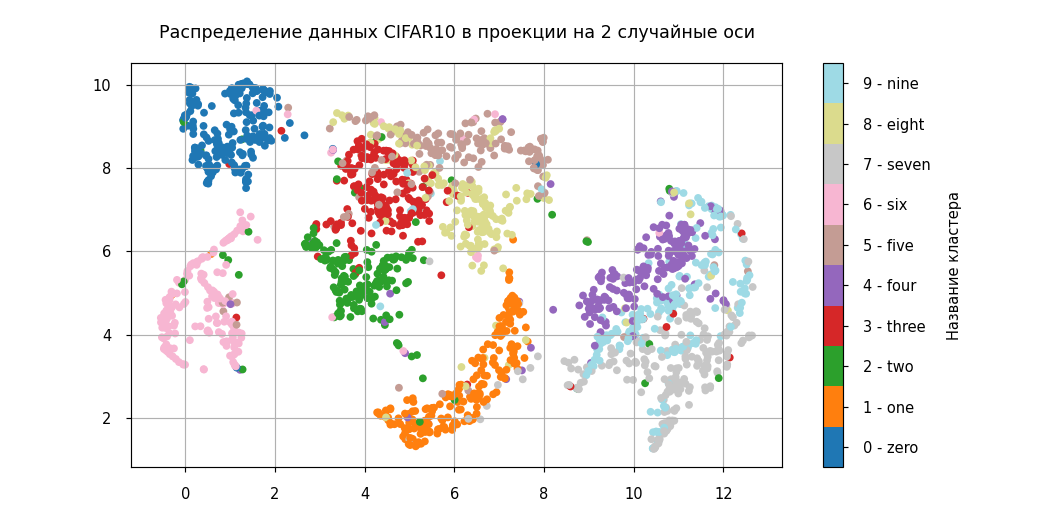

In [35]:
plot_interactive(
    lowd_mnist_data_train, mnist_images_train, mnist_labels_train,
    mnist_test_dataset.classes, n_dots=2000, image_scale=0.35
)

Вернёмся в статичный режим отрисовки изображений:

In [36]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

#### <font color='DarkOrange'>**Задание 1.4 [код]**</font>

Разбейте выборку следующим образом:
1. Разбейте случайным образом обучающую выборку на 2 части — размеченную и неразмеченную. Считайте, что доля размеченных объектов — `fraction_of_labeled`. Метки неразмеченной части замените на $-1$.
2. Тестовую выборку разбейте в соотношении $30$ на $70$ — меньшую часть (далее будет называться **валидационной выборкой**) используйте для подбора гиперпараметров, а большую (**тестовая выборка**) для итоговой оценки качества.

In [186]:
fraction_of_labeled = 0.01

train_indices = np.arange(len(mnist_data_train))
labeled_indices, unlabeled_indices = train_test_split(
    train_indices,
    train_size=fraction_of_labeled,
    stratify=mnist_labels_train,
    random_state=42
)

train_labels_semi = np.full_like(mnist_labels_train, fill_value=-1)
train_labels_semi[labeled_indices] = mnist_labels_train[labeled_indices]

print(f"Train: {len(mnist_data_train)}")
print(f"Labeled: {len(labeled_indices)}")
print(f"Unlabeled: {len(unlabeled_indices)}")

Train: 4000
Labeled: 40
Unlabeled: 3960


In [187]:
test_indices = np.arange(len(mnist_data_test))
val_indices, test_indices_final = train_test_split(
    test_indices,
    test_size=0.7,
    stratify=mnist_labels_test,
    random_state=42
)

val_data = mnist_data_test[val_indices]
val_labels = mnist_labels_test[val_indices]

test_data = mnist_data_test[test_indices_final]
test_labels = mnist_labels_test[test_indices_final]

print(f"Validation: {len(val_data)}")
print(f"Test: {len(test_data)}")

Validation: 1200
Test: 2800


#### <font color='DarkOrange'>**Задание 1.5 [кросспроверка, 2 баллa][код]**</font>

Используя `MetaSemiSupervisedModel` подберите оптимальные параметры:

* `C` — не менее $15$ точек в диапазоне $5-6$ десятичных порядков
* `n_clusters` — не менее $10$ точек вплоть до $100$
* `n_components` — не менее $7$ точек вплоть до $100$

для следующих моделей:
1. Исходные признаки + `LogisticRegression`
2. Исходные признаки + `SelfTrainingClassifier`
3. Исходные признаки + `KMeansClassifier`
4. `UMAP` + `LogisticRegression`
5. `UMAP` + `SelfTrainingClassifier`
6. `UMAP` + `KMeansClassifier`

Подбор каждого гиперпараметра должен быть сопровождён графиками точности на тестовой и валидационной выборках. Изобразите обе линии на одном графике.

<font color='OrangeRed'>**Замечание:**</font> При переборе **обязательно выводите значение найденного оптимального параметра и качество модели с оптимальным гиперпараметром** на выборке для итоговой оценки качества.

В последних трёх моделях используйте гиперпараметры базовых моделей, найденные в первых трёх моделях.

In [193]:
C_values = np.logspace(-5, 0, 15)
n_clusters_values = np.linspace(10, 100, 10, dtype=int)
n_components_values = np.linspace(7, 100, 7, dtype=int)

best_params = {
    'LogisticRegression': {'C': None, 'val_score': -np.inf, 'test_score': None},
    'SelfTrainingClassifier': {'C': None, 'val_score': -np.inf, 'test_score': None},
    'KMeansClassifier': {'n_clusters': None, 'val_score': -np.inf, 'test_score': None},
    'UMAP+LogisticRegression': {'n_components': None, 'val_score': -np.inf, 'test_score': None},
    'UMAP+SelfTrainingClassifier': {'n_components': None, 'val_score': -np.inf, 'test_score': None},
    'UMAP+KMeansClassifier': {'n_components': None, 'val_score': -np.inf, 'test_score': None},
}

In [194]:
def search_params(
    model_key,
    param_name,
    param_values,
    X_train,
    y_train,
    X_val,
    y_val,
    X_test,
    y_test,
    data_processing='None',
    base_model_kwargs={},
    reducer_metric='euclidean'
):
    val_scores = []
    test_scores = []

    best_val_score = -np.inf
    best_param = None
    best_test_score = None

    for param in param_values:
        reducer_kwargs = {}
        model_kwargs = base_model_kwargs.copy()

        if data_processing == 'UMAP':
            reducer_kwargs['n_components'] = param if param_name == 'n_components' else 15
            reducer_kwargs['metric'] = reducer_metric

            if param_name != 'n_components':
                model_kwargs[param_name] = param
        else:
            model_kwargs[param_name] = param

        model = MetaSemiSupervisedModel(
            data_processing=data_processing,
            model=model_key.replace('UMAP+', ''),
            reducer_kwargs=reducer_kwargs,
            model_kwargs=model_kwargs
        )

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            model.fit(X_train, y_train)

        val_pred = model.predict(X_val)
        test_pred = model.predict(X_test)

        val_acc = accuracy_score(y_val, val_pred)
        test_acc = accuracy_score(y_test, test_pred)

        val_scores.append(val_acc)
        test_scores.append(test_acc)

        if val_acc > best_val_score:
            best_val_score = val_acc
            best_param = param
            best_test_score = test_acc

    plt.figure(figsize=(8, 5))
    if param_name == 'C':
        plt.xscale('log')
    plt.plot(param_values, val_scores, label='Validation accuracy', marker='o')
    plt.plot(param_values, test_scores, label='Test accuracy', marker='o')
    plt.title(f'{model_key} tuning {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

    best_params[model_key][param_name] = best_param
    best_params[model_key]['val_score'] = best_val_score
    best_params[model_key]['test_score'] = best_test_score

    print(f"Best {param_name} for {model_key}: {best_param}")
    print(f"Validation accuracy: {best_val_score:.4f}")
    print(f"Test accuracy: {best_test_score:.4f}")

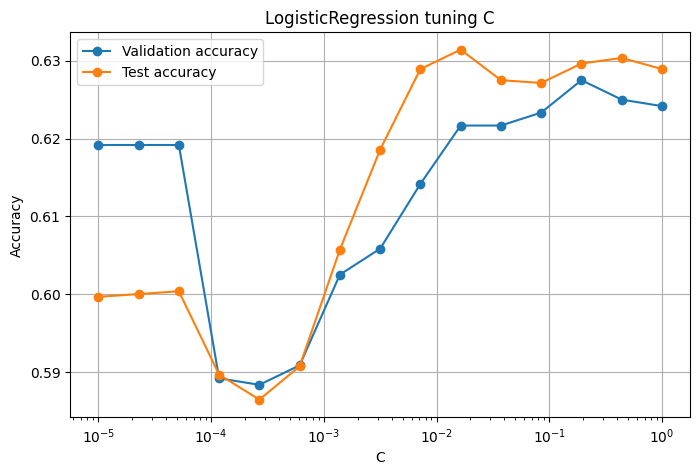

Best C for LogisticRegression: 0.19306977288832497
Validation accuracy: 0.6275
Test accuracy: 0.6296


In [195]:
search_params(
    'LogisticRegression', 'C', C_values,
    mnist_data_train, train_labels_semi,
    val_data, val_labels,
    test_data, test_labels
)

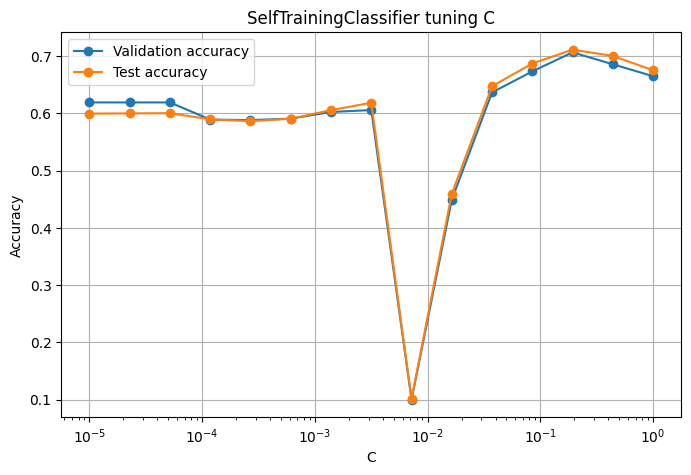

Best C for SelfTrainingClassifier: 0.19306977288832497
Validation accuracy: 0.7067
Test accuracy: 0.7114


In [196]:
search_params(
    'SelfTrainingClassifier', 'C', C_values,
    mnist_data_train, train_labels_semi,
    val_data, val_labels,
    test_data, test_labels
)

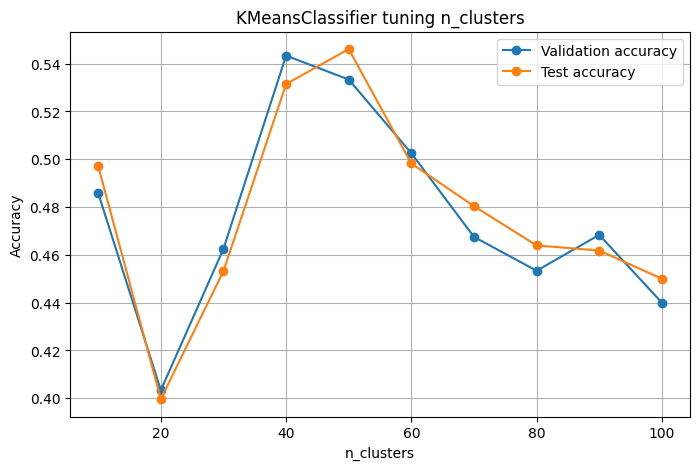

Best n_clusters for KMeansClassifier: 40
Validation accuracy: 0.5433
Test accuracy: 0.5314


In [197]:
search_params(
    'KMeansClassifier', 'n_clusters', n_clusters_values,
    mnist_data_train, train_labels_semi,
    val_data, val_labels,
    test_data, test_labels
)

In [198]:
train_dist_matrix = pairwise_distances(mnist_data_train, metric='euclidean')
val_dist_matrix = pairwise_distances(val_data, mnist_data_train, metric='euclidean')
test_dist_matrix = pairwise_distances(test_data, mnist_data_train, metric='euclidean')

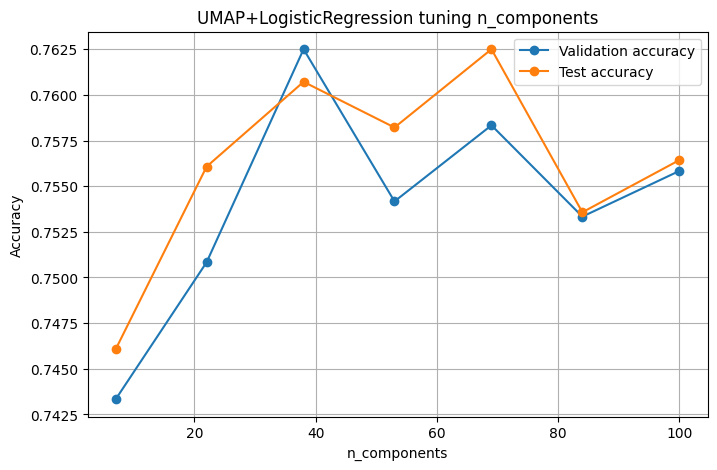

Best n_components for UMAP+LogisticRegression: 38
Validation accuracy: 0.7625
Test accuracy: 0.7607


In [199]:
search_params(
    'UMAP+LogisticRegression', 'n_components', n_components_values,
    train_dist_matrix, train_labels_semi,
    val_dist_matrix, val_labels,
    test_dist_matrix, test_labels,
    'UMAP', {'C': best_params['LogisticRegression']['C']}, 'precomputed'
)

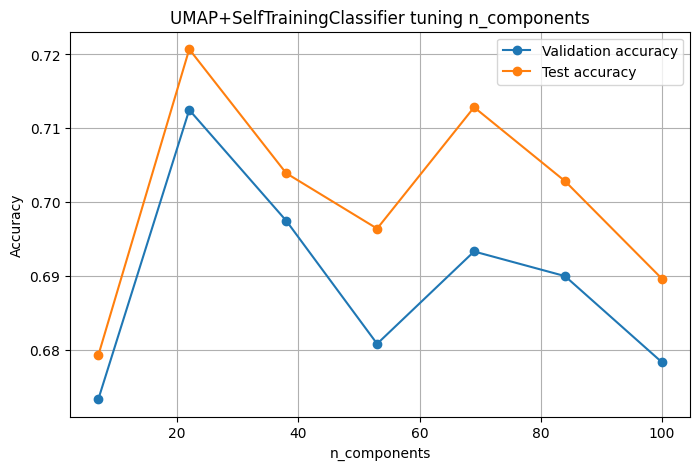

Best n_components for UMAP+SelfTrainingClassifier: 22
Validation accuracy: 0.7125
Test accuracy: 0.7207


In [200]:
search_params(
    'UMAP+SelfTrainingClassifier', 'n_components', n_components_values,
    train_dist_matrix, train_labels_semi,
    val_dist_matrix, val_labels,
    test_dist_matrix, test_labels,
    'UMAP', {'C': best_params['SelfTrainingClassifier']['C']}, 'precomputed'
)

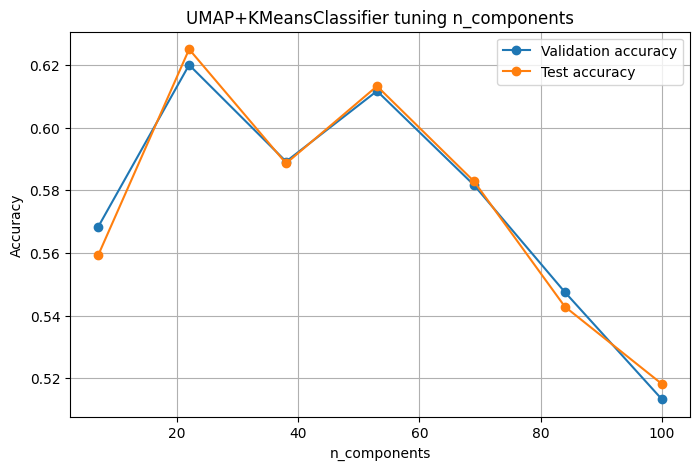

Best n_components for UMAP+KMeansClassifier: 22
Validation accuracy: 0.6200
Test accuracy: 0.6250


In [201]:
search_params(
    'UMAP+KMeansClassifier', 'n_components', n_components_values,
    train_dist_matrix, train_labels_semi,
    val_dist_matrix, val_labels,
    test_dist_matrix, test_labels,
    'UMAP', {'n_clusters': best_params['KMeansClassifier']['n_clusters']}, 'precomputed'
)

In [202]:
params = best_params.copy()

for model in ['UMAP+LogisticRegression', 'UMAP+SelfTrainingClassifier', 'UMAP+KMeansClassifier']:
    base_model = model.replace('UMAP+', '')
    if 'C' in best_params[base_model]:
        params[model]['C'] = best_params[base_model]['C']
    if 'n_clusters' in best_params[base_model]:
        params[model]['n_clusters'] = best_params[base_model]['n_clusters']

df = pd.DataFrame(params).T

columns_order = ['C', 'n_clusters', 'n_components', 'val_score', 'test_score']

for col in columns_order:
    if col not in df.columns:
        df[col] = ''

df = df[columns_order]
df = df.replace({np.nan: '‒'})
df

,C,n_clusters,n_components,val_score,test_score
LogisticRegression,0.19307,‒,‒,0.627500,0.629643
SelfTrainingClassifier,0.19307,‒,‒,0.706667,0.711429
KMeansClassifier,‒,40.0,‒,0.543333,0.531429
UMAP+LogisticRegression,0.19307,‒,38.0,0.762500,0.760714
UMAP+SelfTrainingClassifier,0.19307,‒,22.0,0.712500,0.720714
UMAP+KMeansClassifier,‒,40.0,22.0,0.620000,0.625000


#### <font color='DarkOrange'>**Задание 1.6 [кросспроверка, 2 баллa][вопрос]**</font>

Опишите полученные результаты. Какая модель проявила себя лучше всего? Как влияет на результат снижение размерности признакового пространства?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Лучше всего себя проявила модель LogisticRegression с применением UMAP (test_score = 0.760714)

При снижении размерности качество всех алгоритмов улучшилось:  
*   LogisticRegression: 0.629643 < 0.760714
*   SelfTrainingClassifier: 0.711429 < 0.720714
*   KMeansClassifier: 0.531429 < 0.625000

SelfTrainingClassifier без UMAP работает лучше LogisticRegression без UMAP — благодаря способности использовать неразмеченные данные. Однако после применения UMAP качество LogisticRegression становится выше  
Поскольку KMeansClassifier использовался в самом простом варианте, то он уступает по качеству моделям, использующим разметку

#### <font color='DarkOrange'>**Задание 1.7 [кросспроверка, 1 балл][код]**</font>

Обучите каждую из шести моделей на выборках с разной долей размеченных объектов. Используйте оптимальные параметры из предыдущего пункта. Изобразите итоговое качество в зависимости от доли размеченных объектов для всех моделей на одном графике.

Используйте сетку для перебора, указанную ниже. При желании можете взять больше точек.

In [209]:
fraction_of_labeled_range = [0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 0.99]

models = [
    'LogisticRegression',
    'SelfTrainingClassifier',
    'KMeansClassifier',
    'UMAP+LogisticRegression',
    'UMAP+SelfTrainingClassifier',
    'UMAP+KMeansClassifier'
]

results = {model: [] for model in models}

train_dist_matrix = pairwise_distances(mnist_data_train, metric='euclidean')
test_dist_matrix = pairwise_distances(mnist_data_test, mnist_data_train, metric='euclidean')

In [210]:
for fraction in tqdm(fraction_of_labeled_range, desc='Fractions'):
    train_indices = np.arange(len(mnist_data_train))
    labeled_indices, _ = train_test_split(
        train_indices,
        train_size=fraction,
        stratify=mnist_labels_train,
        random_state=42
    )
    train_labels_semi = np.full_like(mnist_labels_train, fill_value=-1)
    train_labels_semi[labeled_indices] = mnist_labels_train[labeled_indices]

    for model_key in models:
        if model_key.startswith('UMAP'):
            data_processing = 'UMAP'
            reducer_kwargs = {
                'n_components': best_params[model_key].get('n_components', 15),
                'metric': 'precomputed'
            }
            X_train = train_dist_matrix
            X_test = test_dist_matrix
            y_train = train_labels_semi
            y_test = mnist_labels_test
        else:
            data_processing = None
            reducer_kwargs = {}
            X_train = mnist_data_train
            X_test = mnist_data_test
            y_train = train_labels_semi
            y_test = mnist_labels_test

        base_model = model_key.replace('UMAP+', '')
        model_kwargs = {}
        if 'C' in best_params[base_model] and best_params[base_model]['C'] is not None:
            model_kwargs['C'] = best_params[base_model]['C']
        if 'n_clusters' in best_params[base_model] and best_params[base_model]['n_clusters'] is not None:
            model_kwargs['n_clusters'] = best_params[base_model]['n_clusters']

        model = MetaSemiSupervisedModel(
            data_processing=data_processing,
            model=base_model,
            reducer_kwargs=reducer_kwargs,
            model_kwargs=model_kwargs
        )

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            model.fit(X_train, y_train)

        test_pred = model.predict(X_test)
        test_acc = accuracy_score(y_test, test_pred)
        results[model_key].append(test_acc)

Fractions: 100%|██████████| 8/8 [16:46<00:00, 125.85s/it]


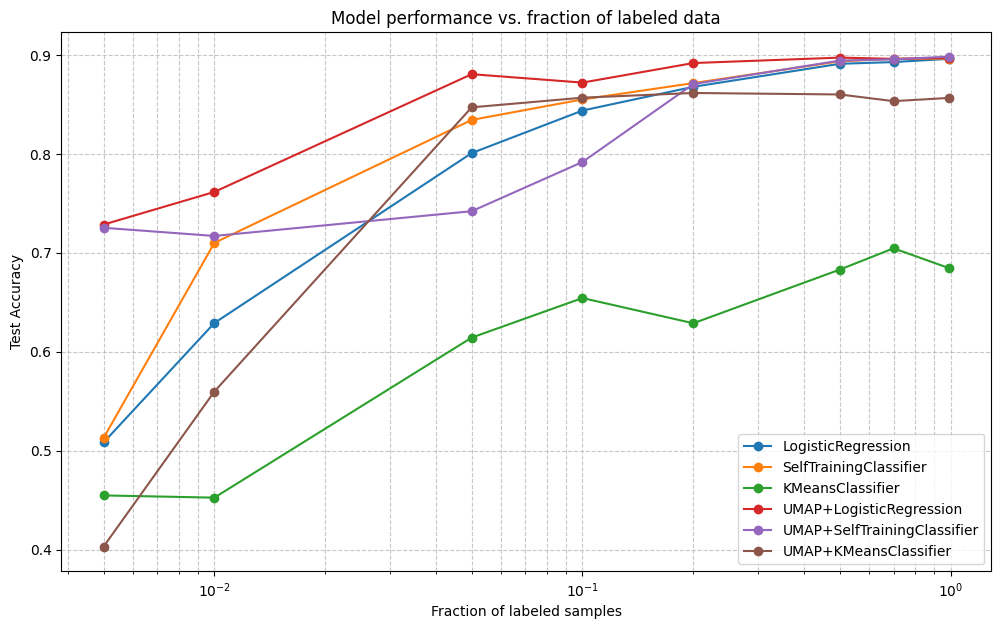

In [211]:
plt.figure(figsize=(12, 7))
for model_key, accuracies in results.items():
    plt.plot(fraction_of_labeled_range, accuracies, marker='o', label=model_key)

plt.xscale('log')
plt.xlabel('Fraction of labeled samples')
plt.ylabel('Test Accuracy')
plt.title('Model performance vs. fraction of labeled data')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [217]:
df = pd.DataFrame(results)
df.index = fraction_of_labeled_range
df = df.T
df

,0.005,0.010,0.050,0.100,0.200,0.500,0.700,0.990
LogisticRegression,0.50825,0.62900,0.80075,0.84375,0.86775,0.89100,0.89275,0.89600
SelfTrainingClassifier,0.51275,0.71000,0.83425,0.85500,0.87150,0.89350,0.89600,0.89625
KMeansClassifier,0.45475,0.45250,0.61425,0.65425,0.62875,0.68300,0.70450,0.68450
UMAP+LogisticRegression,0.72850,0.76150,0.88050,0.87200,0.89175,0.89725,0.89600,0.89700
UMAP+SelfTrainingClassifier,0.72525,0.71700,0.74200,0.79175,0.87050,0.89425,0.89550,0.89825
UMAP+KMeansClassifier,0.40300,0.55975,0.84700,0.85675,0.86150,0.86000,0.85325,0.85650


#### <font color='DarkOrange'>**Задание 1.8 [кросспроверка, 1 балл][вопрос]**</font>

Как разные модели ведут себя в зависимости от объёма размеченных данных? Какой размер выборки достаточно разметить, чтобы получить близкое к максимальному качество? В каких случаях может быть выгодно использовать методы снижения размерности?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

**Общие наблюдения:**  
Качество моделей, учитывающих разметку, растёт с увеличением доли размеченных данных  
При небольшой доле размеченных данных понижение размерности с помощью UMAP помогает улучшить качество моделей

**Сравнение моделей:**  
При небольшой доле размеченных данных SelfTrainingClassifier без UMAP работает лучше LogisticRegression — благодаря способности использовать неразмеченные данные. Однако после применения UMAP качество LogisticRegression становится выше    
KMeansClassifier без использования UMAP уступает по качеству другим моделям  
Лучше всего справилась LogisticRegression с использованием UMAP  

**Оптимальная разметка:**  
Достаточно разметить около 10-20% данных, чтобы получить качество близкое к максимальному, дальнейшее увеличение даёт относительно небольшой прирост в качестве

**Использование методов снижения размерности:**  
Выгодно использовать при малой разметке, при высокой размерности данных. Для повышения качества простых моделей, ускорения обучения и повышения устойчивости к переобучению





----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

#### <font color='MediumSeaGreen'>**Задание 1.9 [бонус, 1 балл]**</font>

Вставьте картинку/музыку/текст и пр., описывающее ваше ощущение от погружения в ML :)

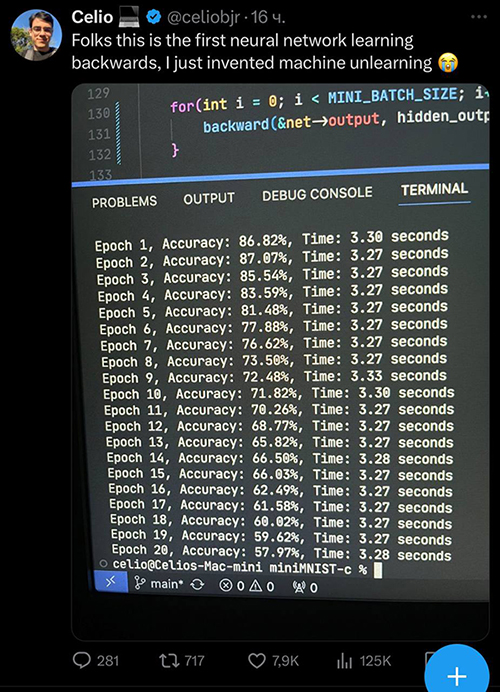